In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [33]:
x,y = make_blobs(n_samples=10000,n_features=2,centers=3,random_state=42)

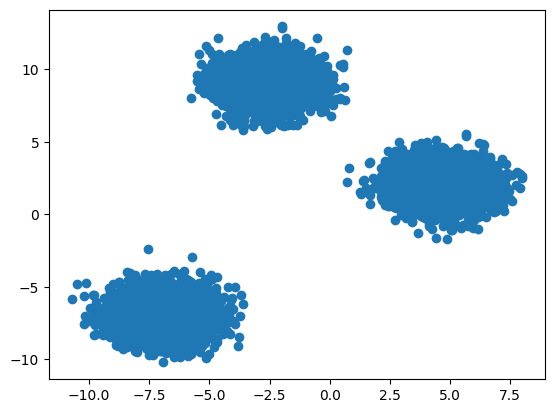

In [34]:
plt.scatter(x[:,0],x[:,1])

In [35]:
from sklearn.cluster import KMeans

In [36]:
obj = KMeans(n_clusters=3,init='k-means++')

In [37]:
obj.fit(x)

KMeans(n_clusters=3)

In [38]:
obj.labels_

array([1, 2, 1, ..., 2, 1, 1])

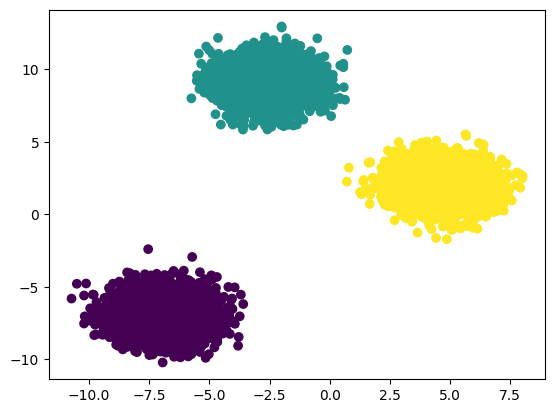

In [39]:
plt.scatter(x[:,0],x[:,1],c=obj.labels_)

In [40]:
wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [41]:
wcss

[666581.2685571671,
 188100.03739296139,
 20087.30494594766,
 17869.178026225272,
 15678.620341545806,
 13492.834272671887,
 12094.80740469054,
 10667.507005955938,
 9238.156797564205,
 8592.18606731637,
 7939.973985617111,
 7263.726235309978,
 6882.004711652362,
 6504.527173400334,
 6105.736808750558,
 5773.277190418988,
 5403.521649146458,
 5070.668280185804,
 4851.888353607817]

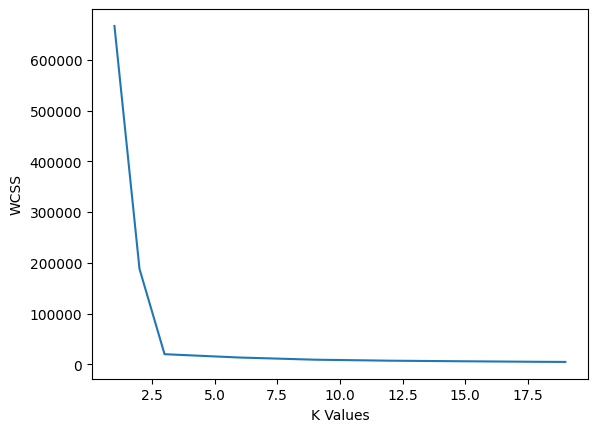

In [42]:
plt.plot(range(1,20),wcss)
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [43]:
from kneed import KneeLocator

In [44]:
k = KneeLocator(range(1,20),wcss,direction='decreasing',curve='convex')

In [45]:
k.elbow

3

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
error = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    score = silhouette_score(x,kmeans.labels_)
    error.append(score)

In [48]:
error

[0.7044756975100971,
 0.8411357171702263,
 0.6532086615602608,
 0.4783223941810021,
 0.31069256188195155,
 0.31795583995051363,
 0.32091104180139657,
 0.32748480608291236,
 0.32423863486669496,
 0.3168998349848284,
 0.3093842069616403,
 0.3076248937785488,
 0.30632835046030393,
 0.3145923771314562,
 0.31044850558228043,
 0.3171092017885141,
 0.32352970438179357,
 0.3229489299210757]

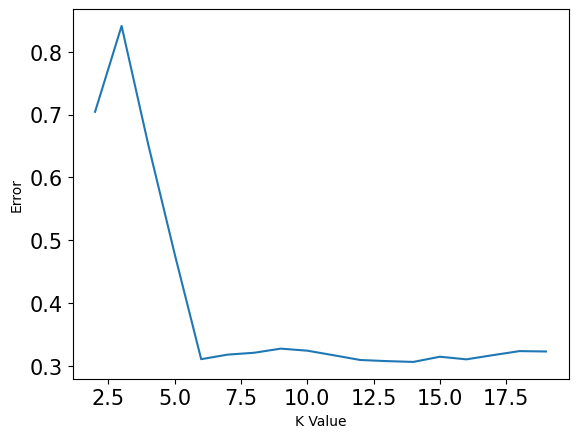

In [49]:
plt.plot(range(2,20),error)
plt.xlabel('K Value')
plt.ylabel('Error')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()